In [82]:
import os
from IPython.display import clear_output

from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img,array_to_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf



In [83]:
from sklearn.externals import joblib

In [84]:
#Normalize images 
train_datagen = ImageDataGenerator(rescale=1. / 255)

In [85]:

#Resize images, if needed
train = train_datagen.flow_from_directory('dataset/', 
                                          target_size=(64, 64), 
                                          batch_size=64, 
                                          class_mode=None)


Found 10657 images belonging to 149 classes.


In [86]:

X_ =[]
Y =[]


In [87]:
for i in range(167):

    for img in train[i]:
        clear_output(wait=True)
        print(i)
        try:
          lab = rgb2lab(img)
          X_.append(lab[:,:,0]) 
          Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
      #so we divide the values by 128 to restrict values to between -1 and 1.
        except:
         print('error')



166


In [88]:
X = np.array(X_)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)

(10657, 64, 64, 1)
(10657, 64, 64, 2)


In [89]:
X_.clear()

In [97]:
# down extraction

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2, input_shape=(64, 64, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))


In [98]:
# up extration

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 8, 8, 256)        

In [100]:


model.fit(X,Y,validation_split=0.3, epochs=100, batch_size=64)


Train on 7459 samples, validate on 3198 samples
Epoch 1/100
7459/7459 [==============================] - 71s 10ms/step - loss: 0.0221 - accuracy: 0.7039 - val_loss: 0.0244 - val_accuracy: 0.6689
Epoch 2/100
7459/7459 [==============================] - 71s 10ms/step - loss: 0.0217 - accuracy: 0.7024 - val_loss: 0.0243 - val_accuracy: 0.6627
Epoch 3/100
7459/7459 [==============================] - 72s 10ms/step - loss: 0.0208 - accuracy: 0.7105 - val_loss: 0.0241 - val_accuracy: 0.6697
Epoch 4/100
7459/7459 [==============================] - 72s 10ms/step - loss: 0.0201 - accuracy: 0.7067 - val_loss: 0.0246 - val_accuracy: 0.6741
Epoch 5/100
7459/7459 [==============================] - 71s 10ms/step - loss: 0.0192 - accuracy: 0.7187 - val_loss: 0.0244 - val_accuracy: 0.6724
Epoch 6/100
7459/7459 [==============================] - 73s 10ms/step - loss: 0.0183 - accuracy: 0.7203 - val_loss: 0.0244 - val_accuracy: 0.6618
Epoch 7/100
7459/7459 [==============================] - 72s 10ms/step

7459/7459 [==============================] - 72s 10ms/step - loss: 0.0075 - accuracy: 0.7670 - val_loss: 0.0242 - val_accuracy: 0.6534
Epoch 57/100
7459/7459 [==============================] - 73s 10ms/step - loss: 0.0074 - accuracy: 0.7678 - val_loss: 0.0246 - val_accuracy: 0.6484
Epoch 58/100
7459/7459 [==============================] - 75s 10ms/step - loss: 0.0073 - accuracy: 0.7663 - val_loss: 0.0241 - val_accuracy: 0.6556
Epoch 59/100
7459/7459 [==============================] - 73s 10ms/step - loss: 0.0072 - accuracy: 0.7717 - val_loss: 0.0243 - val_accuracy: 0.6480
Epoch 60/100
7459/7459 [==============================] - 75s 10ms/step - loss: 0.0071 - accuracy: 0.7715 - val_loss: 0.0244 - val_accuracy: 0.6513
Epoch 61/100
7459/7459 [==============================] - 72s 10ms/step - loss: 0.0071 - accuracy: 0.7585 - val_loss: 0.0242 - val_accuracy: 0.6437
Epoch 62/100
7459/7459 [==============================] - 72s 10ms/step - loss: 0.0071 - accuracy: 0.7687 - val_loss: 0.0242 

In [101]:
joblib_file = "Joblib_RL_model.pkl"

In [102]:
joblib.dump(model,joblib_file)

['Joblib_RL_model.pkl']

In [103]:
from skimage.io import imshow

In [104]:

img1_color=[]
img  = load_img('dataset/Abra/2eb2a528f9a247358452b3c740df69a0.jpg')
img_g  = load_img('dataset/Abra/2eb2a528f9a247358452b3c740df69a0.jpg',grayscale = True)
img1=img_to_array(load_img('dataset/Abra/2eb2a528f9a247358452b3c740df69a0.jpg'))
img1 = resize(img1 ,(64,64))
img.show(img_g)
img.show(img)
img1_color.append(img1)
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))
output1 = model.predict(img1_color)
output1 = output1*128
result = np.zeros((64, 64, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
final = lab2rgb(result)



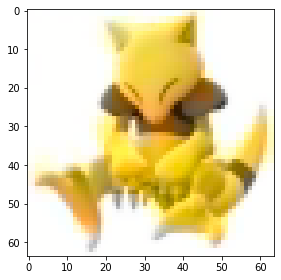

In [105]:
imshow(final)

In [106]:
img  = load_img('dataset/Abra/2eb2a528f9a247358452b3c740df69a0.jpg',grayscale = True)
# convert image to a numpy array
img_array = img_to_array(img)
# load the image to confirm it was saved correctly


img.show()